In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = "../../../Risultati/Air_Quality/outlier_detection_regression.csv"
df = pd.read_csv(path)
df.head()
df.reset_index(drop=True)
df['percentage'] = 100 - df['percentage']
df

,percentage,outlier,imputation,r2
0,100,none,none,0.783927
1,100,none,none,0.783063
2,100,none,none,0.784079
3,90,none,none,0.773247
4,90,z,none,0.755079
...,...,...,...,...
198,50,none,none,0.746497
199,50,z,none,0.742104
200,50,lof,none,0.473599
201,50,iforest,none,0.264769


In [3]:
df_grouped = df.groupby(['outlier','imputation']).mean().sort_values(by='r2', ascending=False)
print(df_grouped)

                    percentage        r2
outlier imputation                      
none    none         72.093023  0.761807
z       none         70.000000  0.743667
hst     none         70.000000  0.615455
lof     none         70.000000  0.539842
iforest none         70.000000  0.243171


In [4]:
top_performance = df[df['percentage']==100]['r2'].mean()
top_performance

0.7836899009994855

In [5]:
df['percent_diff'] = (((df['r2'] - top_performance) / top_performance) * 100).round(2)
df

,percentage,outlier,imputation,r2,percent_diff
0,100,none,none,0.783927,0.03
1,100,none,none,0.783063,-0.08
2,100,none,none,0.784079,0.05
3,90,none,none,0.773247,-1.33
4,90,z,none,0.755079,-3.65
...,...,...,...,...,...
198,50,none,none,0.746497,-4.75
199,50,z,none,0.742104,-5.31
200,50,lof,none,0.473599,-39.57
201,50,iforest,none,0.264769,-66.22


In [6]:
tabella = df.groupby(['outlier','imputation','percentage']).mean()
tabella['r2'] = tabella['r2'].round(4)
tabella['percent_diff'] = tabella['percent_diff'].round(2)
tabella.sort_values(by=['outlier','imputation'],ascending=False).to_csv("3_r.csv")
tabella = tabella.reset_index()
tabella = tabella.pivot(index=['outlier','imputation'],columns='percentage',values='percent_diff').reset_index().sort_values(by=[100,90,80,70],ascending=False)
tabella.to_csv("3_r_n.csv")

In [7]:
df_none = df[(df['outlier'] == 'none')].groupby(['percentage']).mean(numeric_only=True).reset_index()
df_none

,percentage,r2,percent_diff
0,50,0.748921,-4.43750
1,60,0.752632,-3.96375
2,70,0.758996,-3.15125
3,80,0.767172,-2.10875
4,90,0.773105,-1.35000
5,100,0.783690,0.00000


In [8]:
df_z = df[(df['outlier'] == 'z')].groupby(['percentage']).mean(numeric_only=True).reset_index()
df_z

,percentage,r2,percent_diff
0,50,0.744219,-5.03750
1,60,0.737152,-5.93750
2,70,0.738186,-5.80500
3,80,0.744772,-4.96625
4,90,0.754007,-3.78875


In [9]:
df_lof = df[(df['outlier'] == 'lof')].groupby(['percentage']).mean(numeric_only=True).reset_index()
df_lof

,percentage,r2,percent_diff
0,50,0.475303,-39.35000
1,60,0.458924,-41.44125
2,70,0.506767,-35.33500
3,80,0.587138,-25.08000
4,90,0.671077,-14.37000


In [10]:
df_if = df[(df['outlier'] == 'iforest')].groupby(['percentage']).mean(numeric_only=True).reset_index()
df_if

,percentage,r2,percent_diff
0,50,0.263610,-66.36500
1,60,0.261616,-66.61750
2,70,0.265581,-66.11125
3,80,0.255020,-67.45875
4,90,0.170031,-78.30500


In [11]:
df_hst = df[(df['outlier'] == 'hst')].groupby(['percentage']).mean(numeric_only=True).reset_index()
df_hst

,percentage,r2,percent_diff
0,50,0.485500,-38.05000
1,60,0.555409,-29.12750
2,70,0.625964,-20.12750
3,80,0.680949,-13.11000
4,90,0.729455,-6.92125


[]

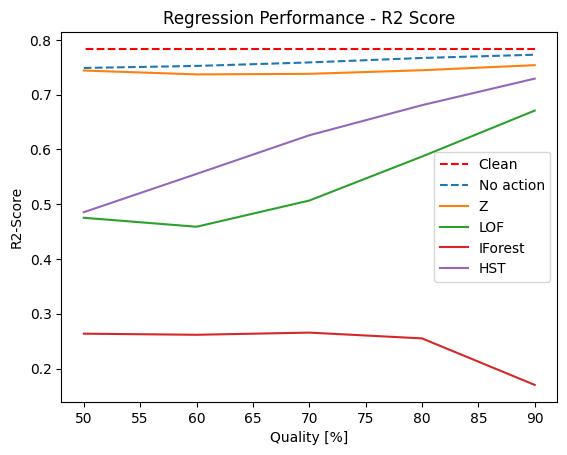

In [12]:
perc = [90,80,70,60,50]
plt.plot(perc, [df_none['r2'].iloc[-1]]*len(perc), 'r--', label='Clean')
plt.plot(df_none['percentage'].iloc[:-1],df_none['r2'].iloc[:-1], '--', label='No action')
plt.plot(df_z['percentage'],df_z['r2'], label='Z')
plt.plot(df_lof['percentage'],df_lof['r2'], label='LOF')
plt.plot(df_if['percentage'],df_if['r2'], label='IForest')
plt.plot(df_hst['percentage'],df_hst['r2'], label='HST')
plt.title("Regression Performance - R2 Score")
plt.ylabel("R2-Score")
plt.xlabel("Quality [%]")
plt.legend()
plt.plot()

[]

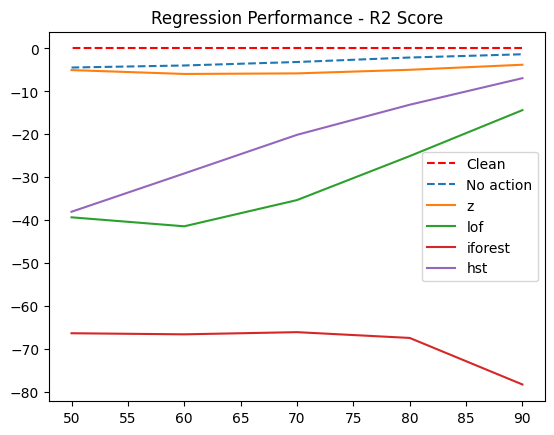

In [13]:
perc = [90,80,70,60,50]
plt.plot(perc, [df_none['percent_diff'].iloc[-1]]*len(perc), 'r--', label='Clean')
plt.plot(df_none['percentage'].iloc[:-1],df_none['percent_diff'].iloc[:-1], '--', label='No action')
plt.plot(df_z['percentage'],df_z['percent_diff'], label='z')
plt.plot(df_lof['percentage'],df_lof['percent_diff'], label='lof')
plt.plot(df_if['percentage'],df_if['percent_diff'], label='iforest')
plt.plot(df_hst['percentage'],df_hst['percent_diff'], label='hst')
plt.title("Regression Performance - R2 Score")
plt.legend()
plt.plot()